In [ ]:
from zipfile import ZipFile

zip_path = "/content/sentiment images.zip"


extract_path = "/content/i"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping completed!")

Unzipping completed!


Found 21 images belonging to 3 classes.
Found 4 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._w

Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 10s/step - accuracy: 0.1905 - loss: 1.4928 - val_accuracy: 0.2500 - val_loss: 1.5533
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 546ms/step - accuracy: 0.3056 - loss: 1.4797 - val_accuracy: 0.5000 - val_loss: 1.0584


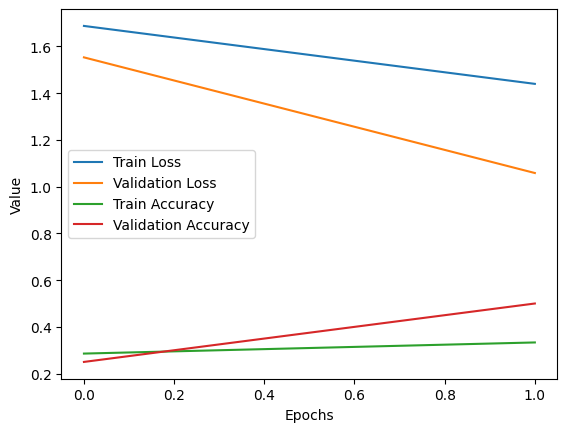

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


IMG_SIZE = 256
BATCH_SIZE = 16
EPOCHS = 2

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    "/content/i/sentiment images/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "/content/i/sentiment images/validation",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

num_classes = train_data.num_classes
# custom architecture
mode = Sequential([


    Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1), padding='valid', activation='relu',
           input_shape=(IMG_SIZE, IMG_SIZE, 3)), #conv1
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu',
           input_shape=(254,254,32)), #conv2
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same',  input_shape=(128,128,32)), # maxpooling


    Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), padding='valid', activation='relu',input_shape=(128,128,64)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu',input_shape=(126,126,64)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same' ,input_shape=(64,64,64)),


    Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1), padding='valid', activation='relu',input_shape=(64,64,128)),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu',input_shape=(62,62,128)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same',input_shape=(32,32,128)),

    Flatten(),


    Dense(512, activation='relu'),

    Dense(512, activation='relu'),



    Dense(num_classes, activation='softmax')
])


mode.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = mode.fit(train_data, validation_data=val_data, epochs=EPOCHS, verbose=1)



plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

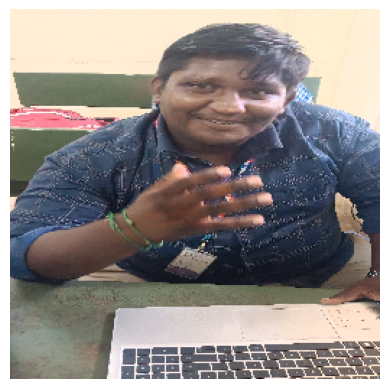

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: Happy


In [ ]:
def predict_image(image_path, model, class_indices):
    image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    prediction = model.predict(image_array)[0]
    predicted_class_index = np.argmax(prediction)
    class_labels = {v: k for k, v in class_indices.items()}

    print(f"Prediction: {class_labels[predicted_class_index].capitalize()}")

predict_image("/content/image/sentiment images/train/happy/IMG20250408121652.jpg", model, train_data.class_indices)

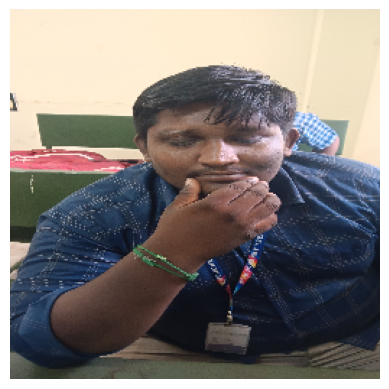

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: Neutral


In [ ]:
def predict_image(image_path, model, class_indices):
    image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    prediction = model.predict(image_array)[0]
    predicted_class_index = np.argmax(prediction)
    class_labels = {v: k for k, v in class_indices.items()}

    print(f"Prediction: {class_labels[predicted_class_index].capitalize()}")

predict_image("/content/image/sentiment images/train/neutral/IMG20250408121716 (1).jpg", model, train_data.class_indices)

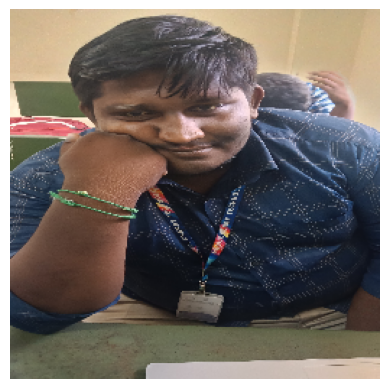

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: Sad


In [ ]:
def predict_image(image_path, model, class_indices):
    image = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

    prediction = model.predict(image_array)[0]
    predicted_class_index = np.argmax(prediction)
    class_labels = {v: k for k, v in class_indices.items()}

    print(f"Prediction: {class_labels[predicted_class_index].capitalize()}")

predict_image("/content/image/sentiment images/train/sad/IMG20250408121708_01.jpg", model, train_data.class_indices)

In [ ]:
def build_model_with_filter_size(kernel_size):
    model = Sequential([
        Conv2D(filters=32, kernel_size=(kernel_size, kernel_size), activation='relu',
               input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        Conv2D(filters=32, kernel_size=(kernel_size, kernel_size), activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

        Conv2D(filters=64, kernel_size=(kernel_size, kernel_size), activation='relu'),
        Conv2D(filters=64, kernel_size=(kernel_size, kernel_size), activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

        Conv2D(filters=128, kernel_size=(kernel_size, kernel_size), activation='relu'),
        Conv2D(filters=128, kernel_size=(kernel_size, kernel_size), activation='relu'),
        MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'),

        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.4),
        Dense(50, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Filters

epochs - 5

(1x1) - 0.48

(2x2) - 0.45

(3x3) - 0.29

(4x4) - 0.37

(5x5) - 0.37

(6x6) - 0.22

(7x7) - 0.22





--- Training model with kernel size: 1x1 ---

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.2254 - loss: 1.6438 - val_accuracy: 0.2500 - val_loss: 1.6585
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 458ms/step - accuracy: 0.3790 - loss: 1.4678 - val_accuracy: 0.5000 - val_loss: 1.0722
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.2889 - loss: 1.3648 - val_accuracy: 0.7500 - val_loss: 1.0722
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 502ms/step - accuracy: 0.3056 - loss: 1.0854 - val_accuracy: 0.7500 - val_loss: 1.0839
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4857 - loss: 1.0876 - val_accuracy: 0.5000 - val_loss: 1.0828


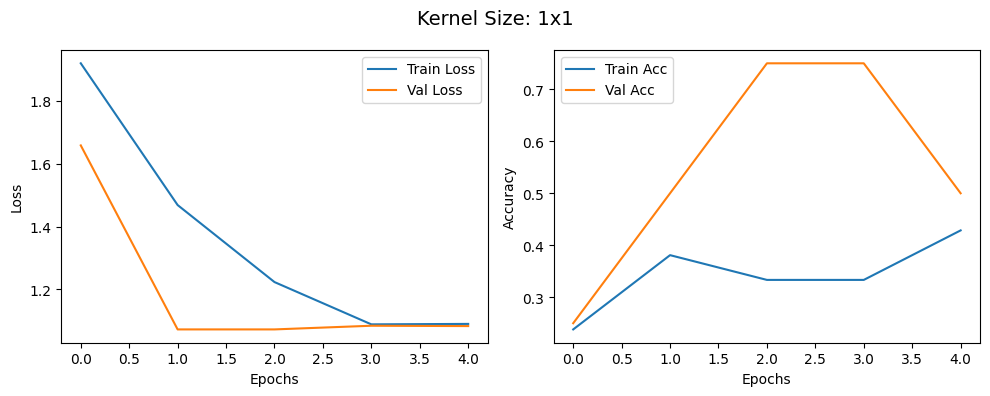



--- Training model with kernel size: 2x2 ---

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 8s/step - accuracy: 0.2889 - loss: 1.2686 - val_accuracy: 0.2500 - val_loss: 1.1082
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.1905 - loss: 1.3252 - val_accuracy: 0.5000 - val_loss: 1.0435
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 500ms/step - accuracy: 0.2847 - loss: 1.1145 - val_accuracy: 0.5000 - val_loss: 1.0477
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3206 - loss: 1.1723 - val_accuracy: 0.2500 - val_loss: 1.0910
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4540 - loss: 1.0511 - val_accuracy: 0.2500 - val_loss: 1.1283


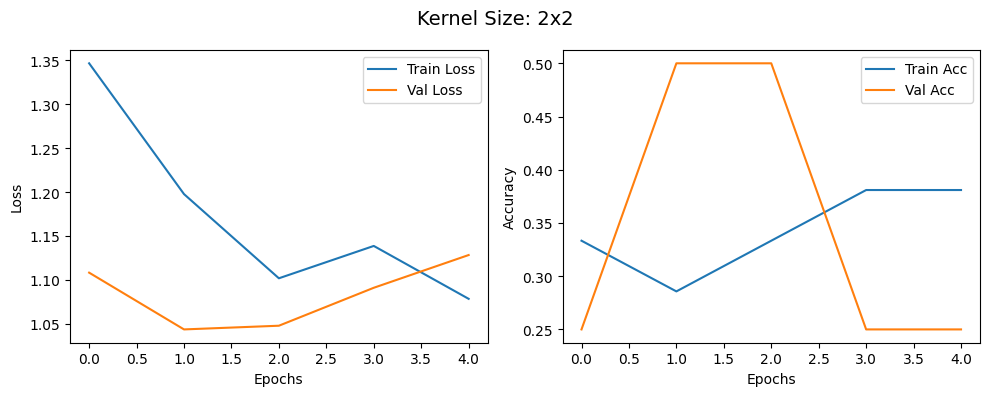



--- Training model with kernel size: 3x3 ---

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 10s/step - accuracy: 0.4222 - loss: 1.2176 - val_accuracy: 0.2500 - val_loss: 1.1071
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3238 - loss: 1.2533 - val_accuracy: 0.2500 - val_loss: 1.1078
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 0.4633 - loss: 1.0905 - val_accuracy: 0.2500 - val_loss: 1.1102
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 645ms/step - accuracy: 0.4107 - loss: 1.0980 - val_accuracy: 0.2500 - val_loss: 1.1101
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 516ms/step - accuracy: 0.2946 - loss: 1.1048 - val_accuracy: 0.2500 - val_loss: 1.1030


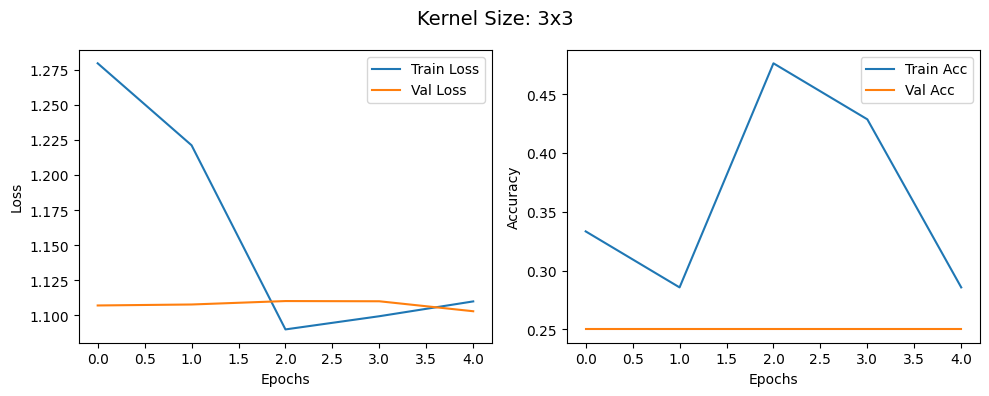



--- Training model with kernel size: 4x4 ---

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.2212 - loss: 1.0660 - val_accuracy: 0.2500 - val_loss: 1.1136
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - accuracy: 0.2946 - loss: 1.1515 - val_accuracy: 0.2500 - val_loss: 1.0982
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3524 - loss: 1.0837 - val_accuracy: 0.2500 - val_loss: 1.1029
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.2603 - loss: 1.3153 - val_accuracy: 0.5000 - val_loss: 1.0897
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 551ms/step - accuracy: 0.3790 - loss: 1.0740 - val_accuracy: 0.5000 - val_loss: 1.0959


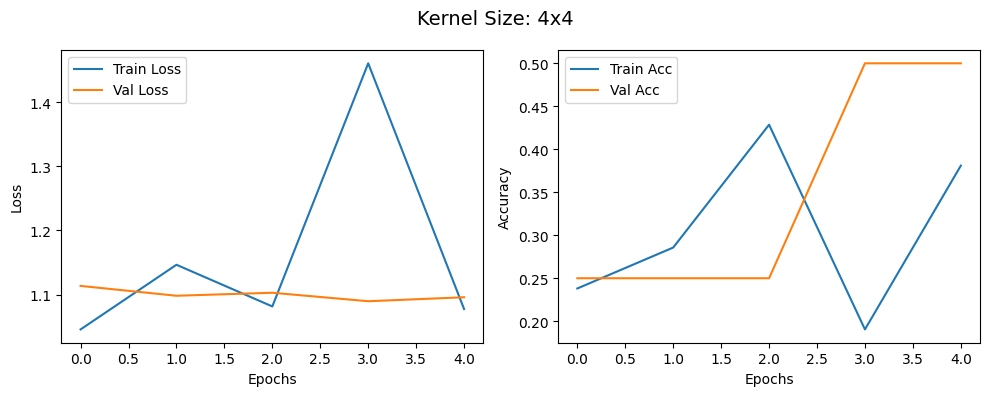



--- Training model with kernel size: 5x5 ---

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.3790 - loss: 1.2908 - val_accuracy: 0.5000 - val_loss: 1.0437
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step - accuracy: 0.3472 - loss: 1.1136 - val_accuracy: 0.5000 - val_loss: 1.0910
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3524 - loss: 1.1063 - val_accuracy: 0.5000 - val_loss: 1.0899
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 489ms/step - accuracy: 0.3790 - loss: 1.0967 - val_accuracy: 0.5000 - val_loss: 1.0718
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 794ms/step - accuracy: 0.3790 - loss: 1.1139 - val_accuracy: 0.5000 - val_loss: 1.0854


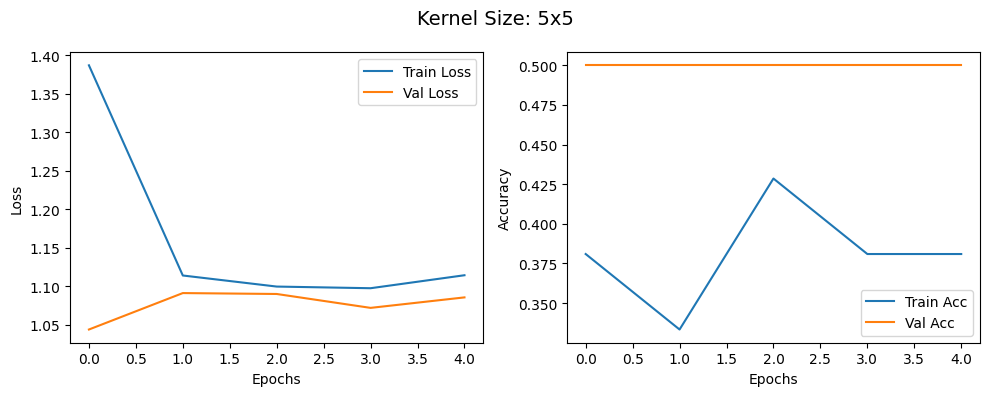



--- Training model with kernel size: 6x6 ---

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 29s 17s/step - accuracy: 0.4540 - loss: 10.0921 - val_accuracy: 0.2500 - val_loss: 1.1393
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.3873 - loss: 1.0914 - val_accuracy: 0.5000 - val_loss: 1.0917
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3556 - loss: 1.1022 - val_accuracy: 0.5000 - val_loss: 1.0971
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 510ms/step - accuracy: 0.4315 - loss: 1.0968 - val_accuracy: 0.5000 - val_loss: 1.0959
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 493ms/step - accuracy: 0.2212 - loss: 1.1050 - val_accuracy: 0.5000 - val_loss: 1.0958


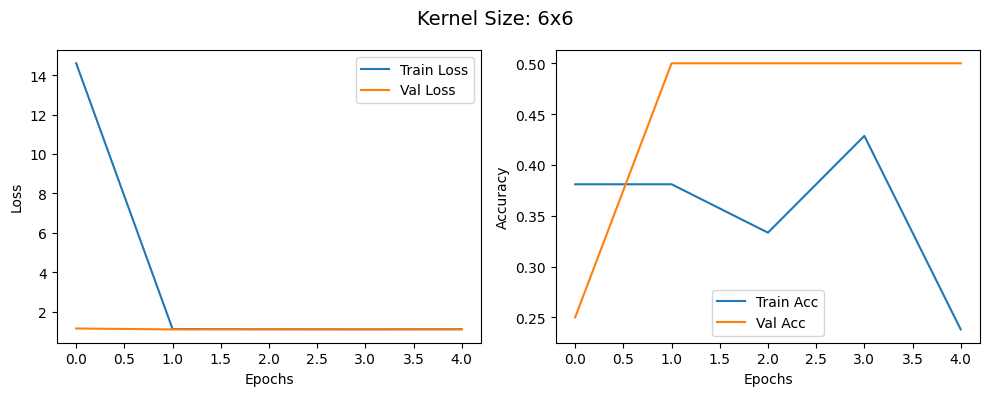



--- Training model with kernel size: 7x7 ---

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 21s/step - accuracy: 0.5175 - loss: 3.3299 - val_accuracy: 0.2500 - val_loss: 1.1176
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 512ms/step - accuracy: 0.2421 - loss: 1.1124 - val_accuracy: 0.2500 - val_loss: 1.1168
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4508 - loss: 1.0745 - val_accuracy: 0.2500 - val_loss: 1.3063
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - accuracy: 0.2421 - loss: 1.7616 - val_accuracy: 0.5000 - val_loss: 1.0839
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.2254 - loss: 1.1083 - val_accuracy: 0.5000 - val_loss: 1.0761


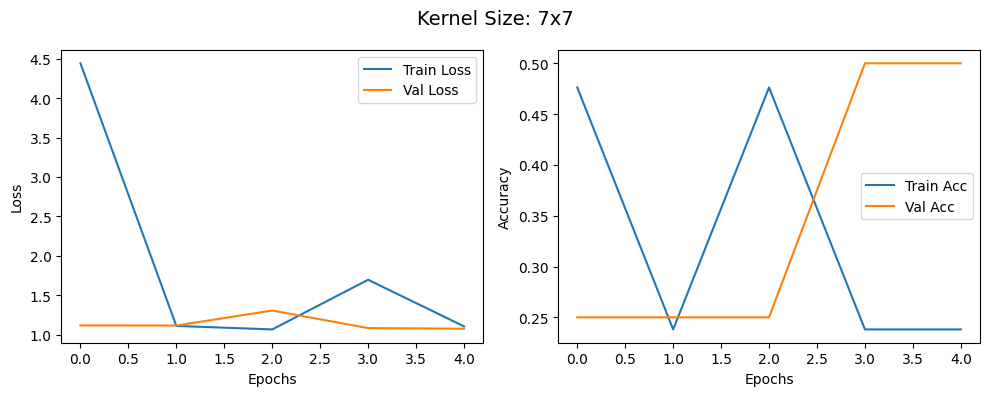

In [ ]:
for k in range(1, 8):
    print(f"\n\n--- Training model with kernel size: {k}x{k} ---\n")
    model = build_model_with_filter_size(k)
    history = model.fit(train_data, validation_data=val_data, epochs=EPOCHS, verbose=1)


    plt.figure(figsize=(10, 4))
    plt.suptitle(f'Kernel Size: {k}x{k}', fontsize=14)

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt


IMG_SIZE = 256
BATCH_SIZE = 16
EPOCHS = 2

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    "/content/i/images/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    "/content/i/images/validation",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

num_classes = train_data.num_classes
# custom architecture
mode = Sequential([


    Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1), padding='valid', activation='relu',
           input_shape=(IMG_SIZE, IMG_SIZE, 3)), #conv1
    Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu',
           input_shape=(254,254,32)), #conv2
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same',  input_shape=(128,128,32)), # maxpooling


    Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), padding='valid', activation='relu',input_shape=(128,128,64)),
    Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu',input_shape=(126,126,64)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same' ,input_shape=(64,64,64)),


    Conv2D(filters=128, kernel_size=(1, 1), strides=(1, 1), padding='valid', activation='relu',input_shape=(64,64,128)),
    Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu',input_shape=(62,62,128)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same',input_shape=(32,32,128)),

    Flatten(),


    Dense(512, activation='relu'),

    Dense(512, activation='relu'),



    Dense(num_classes, activation='softmax')
])


mode.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = mode.fit(train_data, validation_data=val_data, epochs=EPOCHS, verbose=1)



plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


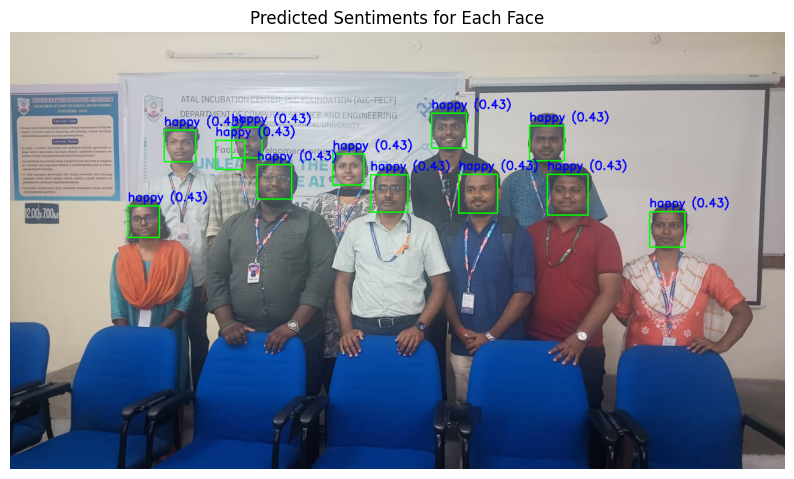

In [ ]:
# --------- START: Group Image Face Prediction ---------
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your group image
image_path = "/content/WhatsApp Image 2025-04-18 at 11.39.29 AM.jpeg"  # Change this path
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

face_imgs = []
face_positions = []

# Preprocess each detected face
for (x, y, w, h) in faces:
    face = img[y:y+h, x:x+w]
    face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
    face = face / 255.0  # Normalize
    face_imgs.append(face)
    face_positions.append((x, y, w, h))

if face_imgs:
    face_imgs = np.array(face_imgs)
    predictions = mode.predict(face_imgs)

    for (x, y, w, h), pred in zip(face_positions, predictions):
        class_index = np.argmax(pred)
        class_label = list(train_data.class_indices.keys())[class_index]
        confidence = np.max(pred)

        # Draw rectangle and label on the image
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, f"{class_label} ({confidence:.2f})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Predicted Sentiments for Each Face")
    plt.show()
else:
    print("No faces detected.") #This line was not indented properly, causing the error.
# --------- END: Group Image Face Prediction ---------

In [ ]:
# ---------------------- Imports ----------------------
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# ---------------------- Config ----------------------
IMG_SIZE = 299  # InceptionV3 default input size
BATCH_SIZE = 16
EPOCHS = 2

# ---------------------- Data Preparation ----------------------
datagen = ImageDataGenerator(rescale=1./255)

train_data = datagen.flow_from_directory(
    "/content/i/images/train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = datagen.flow_from_directory(
    "/content/i/images/validation",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# ---------------------- Handle Class Imbalance ----------------------
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights_array))
print("Class weights:", class_weights)

# ---------------------- Load Pretrained InceptionV3 ----------------------
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ---------------------- Training ----------------------
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    class_weight=class_weights,
    verbose=1
)

# ---------------------- Training Plots ----------------------
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.title("Training vs Validation Metrics")
plt.show()

# ---------------------- Group Image Face Prediction ----------------------
image_path = "/content/WhatsApp Image 2025-04-18 at 11.39.29 AM.jpeg"
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

face_imgs = []
face_positions = []

for (x, y, w, h) in faces:
    face = img[y:y+h, x:x+w]
    face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
    face = face / 255.0

    face_imgs.append(face)
    face_positions.append((x, y, w, h))

if face_imgs:
    face_imgs = np.array(face_imgs)
    predictions = model.predict(face_imgs)

    class_labels = list(train_data.class_indices.keys())

    for (x, y, w, h), pred in zip(face_positions, predictions):
        class_index = np.argmax(pred)
        class_label = class_labels[class_index]
        confidence = np.max(pred)

        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(img, f"{class_label} ({confidence:.2f})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Predicted Sentiments for Each Face")
    plt.show()
else:
    print("No faces detected.")

FileNotFoundError: [Errno 2] No such file or directory: '/content/i/images/train'

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 11s/step - emotion_output_accuracy: 0.2028 - emotion_output_loss: 3.2560 - identity_output_accuracy: 0.2000 - identity_output_loss: 5.0877 - loss: 8.6002 - val_emotion_output_accuracy: 0.7222 - val_emotion_output_loss: 0.5276 - val_identity_output_accuracy: 0.5556 - val_identity_output_loss: 0.7673 - val_loss: 1.3144
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - emotion_output_accuracy: 0.4410 - emotion_output_loss: 1.6354 - identity_output_accuracy: 0.3958 - identity_output_loss: 1.6062 - loss: 2.4612 - val_emotion_output_accuracy: 0.5833 - val_emotion_output_loss: 0.8730 - val_identity_output_accuracy: 0.6111 - val_identity_output_loss: 1.2315 - val_loss: 1.8583
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - emotion_output_accuracy: 0.7903 - emotion_output_loss: 0.6244 - identity_output_accuracy: 0.4597 - identity_output_loss: 1.5840 - loss: 1.6959 - val_emotion_output_accuracy: 0.7778 - val_emotion_output_loss: 0.2797 - val_identity_outpu

Saving IMG20250408101847 - Copy (2).jpg to IMG20250408101847 - Copy (2) (6).jpg
Image uploaded: IMG20250408101847 - Copy (2) (6).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


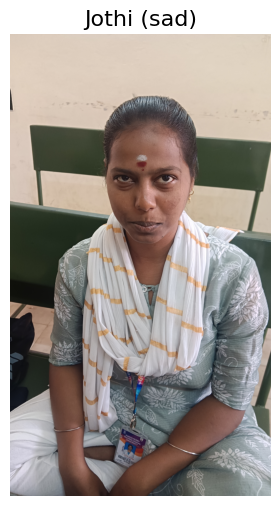

Predicted: Jothi (sad)


In [ ]:
# ---------------------- Imports ----------------------
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import Sequence
from tensorflow.keras.applications import InceptionV3  # ← Use GoogLeNet (InceptionV3)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
import zipfile

# ---------------------- Constants ----------------------
IMG_SIZE = 224
BATCH_SIZE = 16
EPOCHS = 10

# ---------------------- Prepare Data ----------------------
train_folder = "/content/i/sentiment_images[1]/train"
val_folder = "/content/i/sentiment_images[1]/validation"

train_paths = collect_image_paths(train_folder)
val_paths = collect_image_paths(val_folder)


# ---------------------- Build the Model ----------------------
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze feature extractor

x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

identity_output = Dense(len(identity_labels), activation='softmax', name='identity_output')(x)
emotion_output = Dense(3, activation='softmax', name='emotion_output')(x)

model = Model(inputs=base_model.input, outputs=[identity_output, emotion_output])

model.compile(optimizer='adam',
              loss={'identity_output': 'categorical_crossentropy', 'emotion_output': 'categorical_crossentropy'},
              loss_weights={'identity_output': 1.0, 'emotion_output': 0.5},
              metrics={'identity_output': 'accuracy', 'emotion_output': 'accuracy'})

# ---------------------- Train the Model ----------------------
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

# ---------------------- Fine-tuning ----------------------
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss={'identity_output': 'categorical_crossentropy', 'emotion_output': 'categorical_crossentropy'},
              loss_weights={'identity_output': 1.0, 'emotion_output': 0.5},
              metrics={'identity_output': 'accuracy', 'emotion_output': 'accuracy'})

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[early_stop]
)




# ---------------------- Upload Group Image for Prediction ----------------------
uploaded_img = files.upload()
img_path = list(uploaded_img.keys())[0]
print(f"Image uploaded: {img_path}")

# ---------------------- Predict Group Image ----------------------
# ---------------------- Predict Single Face Image ----------------------
def predict_single_face(img_path, model, identity_labels, emotion_labels):
    IMG_SIZE = 224

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for consistency
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_resized = img_resized / 255.0  # Normalize
    img_input = np.expand_dims(img_resized, axis=0)  # Add batch dimension

    id_pred, emo_pred = model.predict(img_input)

    name = identity_labels[np.argmax(id_pred)]
    emotion = emotion_labels[np.argmax(emo_pred)]
    label = f"{name} ({emotion})"

    # Plotting
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(label, fontsize=16)
    plt.show()

    print(f"Predicted: {label}")

# ---------------------- Run Prediction ----------------------
predict_single_face(img_path, model, identity_labels, emotion_labels)



Saving IMG20250408121708_01.jpg to IMG20250408121708_01.jpg
Image uploaded: IMG20250408121708_01.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


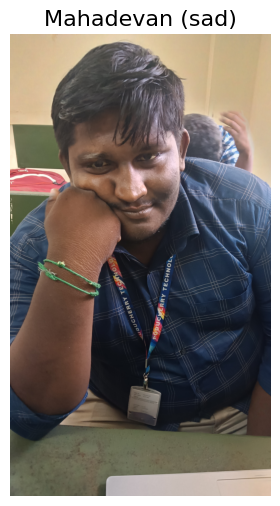

Predicted: Mahadevan (sad)


In [ ]:
uploaded_img = files.upload()
img_path = list(uploaded_img.keys())[0]
print(f"Image uploaded: {img_path}")

# ---------------------- Predict Group Image ----------------------
# ---------------------- Predict Single Face Image ----------------------
def predict_single_face(img_path, model, identity_labels, emotion_labels):
    IMG_SIZE = 224

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for consistency
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_resized = img_resized / 255.0  # Normalize
    img_input = np.expand_dims(img_resized, axis=0)  # Add batch dimension

    id_pred, emo_pred = model.predict(img_input)

    name = identity_labels[np.argmax(id_pred)]
    emotion = emotion_labels[np.argmax(emo_pred)]
    label = f"{name} ({emotion})"

    # Plotting
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(label, fontsize=16)
    plt.show()

    print(f"Predicted: {label}")

# ---------------------- Run Prediction ----------------------
predict_single_face(img_path, model, identity_labels, emotion_labels)

Saving IMG20250408121753 - Copy (2).jpg to IMG20250408121753 - Copy (2).jpg
Image uploaded: IMG20250408121753 - Copy (2).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


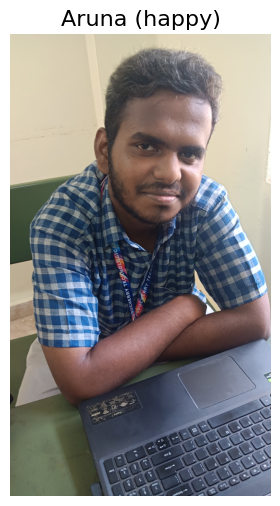

Predicted: Aruna (happy)


In [ ]:
uploaded_img = files.upload()
img_path = list(uploaded_img.keys())[0]
print(f"Image uploaded: {img_path}")

# ---------------------- Predict Group Image ----------------------
# ---------------------- Predict Single Face Image ----------------------
def predict_single_face(img_path, model, identity_labels, emotion_labels):
    IMG_SIZE = 224

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for consistency
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_resized = img_resized / 255.0  # Normalize
    img_input = np.expand_dims(img_resized, axis=0)  # Add batch dimension

    id_pred, emo_pred = model.predict(img_input)

    name = identity_labels[np.argmax(id_pred)]
    emotion = emotion_labels[np.argmax(emo_pred)]
    label = f"{name} ({emotion})"

    # Plotting
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(label, fontsize=16)
    plt.show()

    print(f"Predicted: {label}")

# ---------------------- Run Prediction ----------------------
predict_single_face(img_path, model, identity_labels, emotion_labels)


RNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

sentence = "I am a good student I love learning new things every day. My teachers are proud of my progress. I always try to do my best in everything "
words = sentence.split()
vocab = list(set(words))
word2idx = {w: i for i, w in enumerate(vocab)}
idx2word = {i: w for w, i in word2idx.items()}

vocab_size = len(vocab)
embedding_dim = 10
hidden_size = 16

def make_data(words):
    inputs = []
    targets = []
    for i in range(len(words) - 1):
        inputs.append(word2idx[words[i]])
        targets.append(word2idx[words[i + 1]])
    return torch.tensor(inputs), torch.tensor(targets)

input_tensor, target_tensor = make_data(words)

class WordRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_size):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, embed_dim)
        self.rnn = nn.RNN(embed_dim, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden):
        x = self.embed(x)
        out, hidden = self.rnn(x.unsqueeze(0), hidden)
        out = self.fc(out.squeeze(0))
        return out, hidden

    def init_hidden(self):
        return torch.zeros(1, 1, hidden_size)

model = WordRNN(vocab_size, embedding_dim, hidden_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


for epoch in range(500):
    hidden = model.init_hidden()
    optimizer.zero_grad()
    output, hidden = model(input_tensor, hidden)
    loss = criterion(output, target_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


def predict_next(word):
    if word not in word2idx:
        return "unknown"
    idx = torch.tensor([word2idx[word]])
    hidden = model.init_hidden()
    output, _ = model(idx, hidden)
    pred = torch.argmax(output[-1]).item()
    return idx2word[pred]


test_word = "teachers"
next_word = predict_next(test_word)
print(f"Input word: {test_word} → Predicted next word: {next_word}")

Epoch 0, Loss: 3.2115
Epoch 50, Loss: 0.1283
Epoch 100, Loss: 0.0283
Epoch 150, Loss: 0.0152
Epoch 200, Loss: 0.0099
Epoch 250, Loss: 0.0071
Epoch 300, Loss: 0.0054
Epoch 350, Loss: 0.0043
Epoch 400, Loss: 0.0035
Epoch 450, Loss: 0.0029
Input word: teachers → Predicted next word: are
